<a href="https://colab.research.google.com/github/yasnilamw/MSIB-K2-KelasAwanPintar/blob/main/21_10_24CNN_Indonesian_Food_Classification_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification menggunakan CNN

<img src="https://asset.kompas.com/crops/MVYZa0srvFsVsEPCA3X_qpffmBc=/44x8:1000x645/483x300/data/photo/2019/12/18/5df9e59f4c8b0.jpg">

Dataset yang akan kita gunakan adalah dataset makanan Indonesia yang diambil sebagian dari Kaggle. Dataset dapat didownload [disini](https://drive.google.com/file/d/12aMkT21BxaTkf_FlPYS7fxzDZjunMv-O/view). Setelah dataset diunduh, simpan file zip nya di drive. Kemudian panggil perintah berikut untuk melakukan ekstraksi dataset.

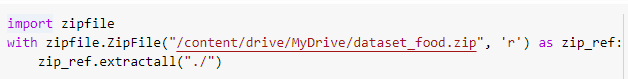

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/dataset_food.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

Di dalam dataset tersebut, terdapat 3 partisi data yang berbeda. Yaitu data training, validation dan juga testing. Berikut adalah perintah untuk melakukan proses loading gambar-gambar di dataset yang sudah kita ekstrak sebelumnya.

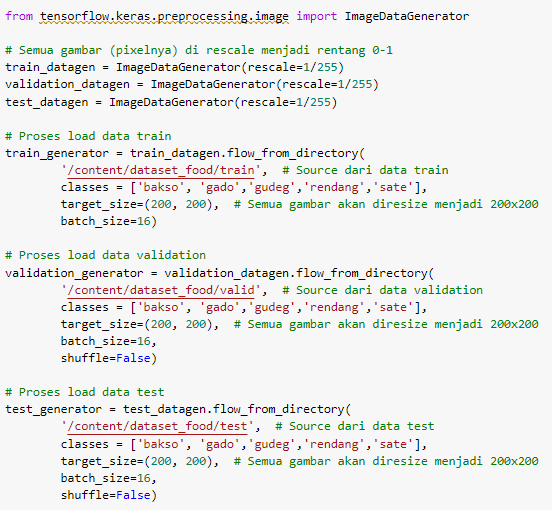

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Semua gambar (pixelnya) di rescale menjadi rentang 0-1
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator (rescale=1/255)
test_datagen = ImageDataGenerator (rescale=1/255)

#Proses load data train
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_food/train', # Source dari data train
    classes = ['bakso', 'gado', 'gudeg', 'rendang','sate'],
    target_size=(200, 200), # Semua gambar akan diresize menjadi 200x200
    batch_size=16)

#Proses load data validation
validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset_food/valid', #Source dari data validation
    classes = ['bakso', 'gado', 'gudeg', 'rendang', 'sate'],
    target_size=(200, 200), # Semua gambar akan diresize menjadi 200x200
    batch_size=16,
    shuffle=False)

#Proses load data test
test_generator = test_datagen.flow_from_directory(
    '/content/dataset_food/test', # Source dari data test
    classes = ['bakso', 'gado', 'gudeg', 'rendang','sate'],
    target_size=(200, 200), # Semua gambar akan diresize menjadi 200x200
    batch_size=16,
    shuffle=False)


Found 3949 images belonging to 5 classes.
Found 902 images belonging to 5 classes.
Found 432 images belonging to 5 classes.


Berikut output load data yang benar :

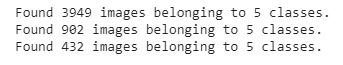

Setelah dataset berhasil di muat, mari kita lanjutkan ke tahap modelling. Berikut adalah beberapa library yang akan dibutuhkan.

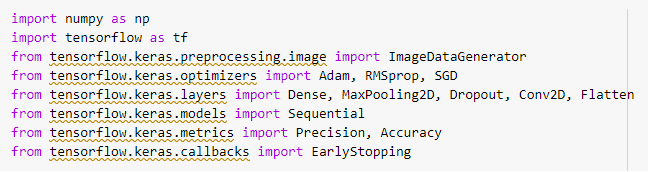

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

Kita akan mencoba arsitektur CNN sebagai berikut.

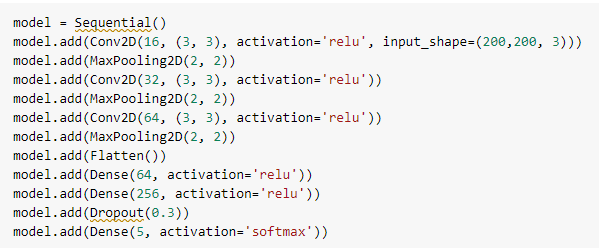

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Lakukan summary model.

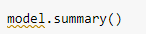

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,208,357 (8.42 MB)

 Trainable params: 2,208,357 (8.42 MB)

 Non-trainable params: 0 (0.00 B)

Lakukan compile terhadap model. Kita juga akan menggunakan Recall, Precision dan Accuracy untuk bahan evaluasi model.

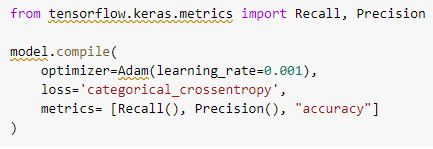

In [ ]:
from tensorflow.keras.metrics import Recall, Precision

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

Berikut ini digunakan untuk memberhentikan proses training dengan ketentuan jika nilai loss dalam 3 iterasi selanjutnya sudah tidak menurun.

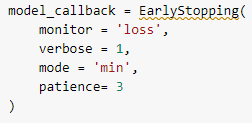

In [ ]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience= 3
)


Lakukan proses training.

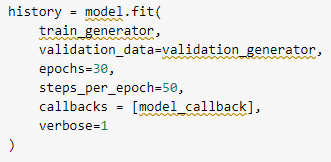

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=50,
    callbacks = [model_callback],
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 901ms/step - accuracy: 0.2603 - loss: 1.5965 - precision: 0.4949 - recall: 0.0333 - val_accuracy: 0.4013 - val_loss: 1.3616 - val_precision: 0.7660 - val_recall: 0.0798
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 892ms/step - accuracy: 0.3827 - loss: 1.4157 - precision: 0.4274 - recall: 0.0800 - val_accuracy: 0.4590 - val_loss: 1.2721 - val_precision: 0.7286 - val_recall: 0.1131
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 888ms/step - accuracy: 0.4666 - loss: 1.2458 - precision: 0.6470 - recall: 0.2046 - val_accuracy: 0.4667 - val_loss: 1.1983 - val_precision: 0.5921 - val_recall: 0.3492
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 888ms/step - accuracy: 0.4484 - loss: 1.3425 - precision: 0.5612 - recall: 0.1852 - val_accuracy: 0.5809 - val_loss: 1.1179 - val_precision: 0.6490 - val_recall: 0.4878
Epoch 5/30
47/50 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.5868 - loss: 1.1440 - precision: 0.6679 - recall: 0.4117

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5885 - loss: 1.1374 - precision: 0.6714 - recall: 0.4144 - val_accuracy: 0.6441 - val_loss: 0.9121 - val_precision: 0.7288 - val_recall: 0.5244
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6391 - loss: 0.9365 - precision: 0.7160 - recall: 0.5061 - val_accuracy: 0.5987 - val_loss: 1.0634 - val_precision: 0.6764 - val_recall: 0.5122
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 916ms/step - accuracy: 0.6714 - loss: 0.8647 - precision: 0.7392 - recall: 0.5699 - val_accuracy: 0.6375 - val_loss: 0.9219 - val_precision: 0.7492 - val_recall: 0.5067
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6733 - loss: 0.8589 - precision: 0.7456 - recall: 0.5510 - val_accuracy: 0.6752 - val_loss: 0.8685 - val_precision: 0.7234 - val_recall: 0.5798
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 901ms/step - accuracy: 0.6462 - loss: 0.9408 - precision: 0.7290 - recall: 0.5217 - val_accuracy: 0.6685 - val_loss: 0.8506 - val_prec

Prediksi data test.

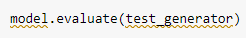

In [ ]:
model.evaluate(test_generator)

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7307 - loss: 1.0042 - precision: 0.7473 - recall: 0.7248


[1.3865731954574585,
 0.6342592835426331,
 0.6634382605552673,
 0.6412037014961243]

Berikut adalah visualisasi nilai loss dari setiap iterasi training yang terjadi.

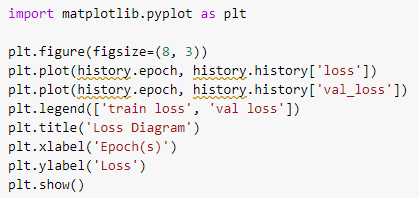

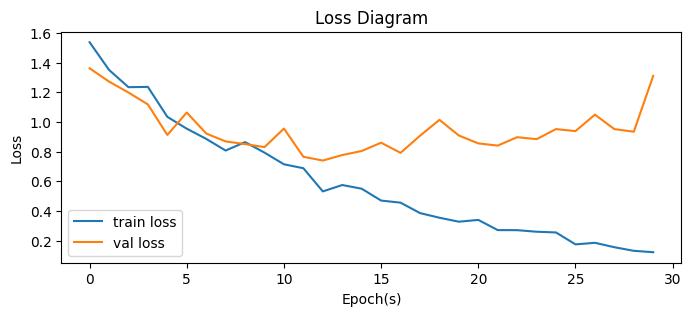

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

Model dapat disimpan dengan menggunakan perintah berikut.

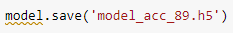

In [ ]:
model.save('model_acc_89.h5')

Lakukan predict ke gambar baru

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(img_path, target_size=(200, 200));
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  classes = model.predict(img_array/255);

  for i, class_ in enumerate(classes[0]):
      if class_ == classes[0].max():
          if i == 0:
              print("bakso")
          elif i == 1:
              print("gado")
          elif i == 2:
              print("gudeg")
          elif i == 3:
              print("rendang")
          else:
              print("sate")